### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

#### 讀取資料

In [1]:
from sklearn import datasets, metrics
digits = datasets.load_digits()

In [2]:
X = digits.data
y = digits.target
X.shape

(1797, 64)

In [3]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

#### 繪圖

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# 隨機挑選10張圖並繪出
def plot_10_img(images, labels, prediction):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    idx = np.random.choice(images.shape[0], 10)
    for i in range(0, 10):
        ax=plt.subplot(5, 2, 1+i)
        
        ax.imshow(np.reshape(images[idx[i]],(8, 8)), cmap='binary')
            
        title= "label: " + str(labels[idx[i]])
        if len(prediction)>0:
            title+=",prediction: "+str(prediction[idx[i]]) 
            
        ax.set_title(title) 
        ax.set_xticks([]);ax.set_yticks([])
    plt.show()

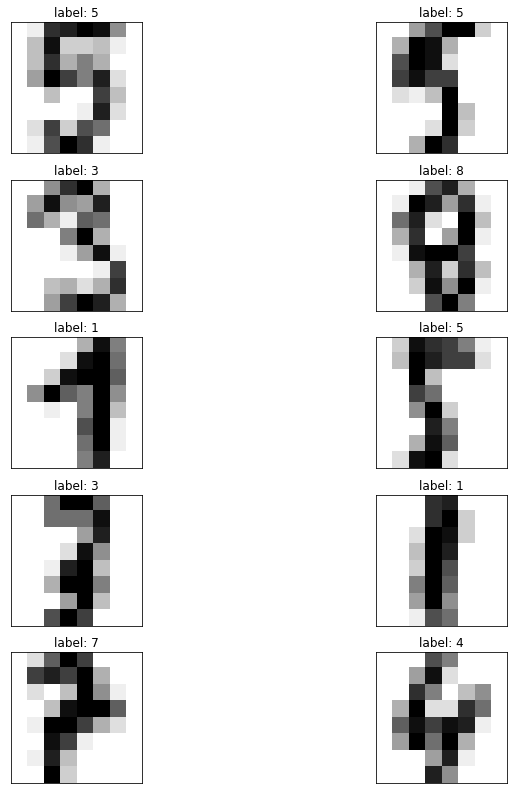

In [5]:
plot_10_img(X, y, [])

#### 簡單資料預處理

In [6]:
np.max(X)

16.0

In [7]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
X = X/np.max(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2019, shuffle =True)
print('shape of x_train:', x_train.shape)
print('shape of x_test: ', x_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test: ', y_test.shape)

shape of x_train: (1347, 64)
shape of x_test:  (450, 64)
shape of y_train: (1347,)
shape of y_test:  (450,)


#### 建立模型並衡量準確性

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Random Forest

In [9]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('Accuracy of Random Forest: %.4f' % accuracy_score(y_test, y_pred))

Accuracy of Random Forest: 0.9422


In [10]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[47  0  0  0  0  0  0  0  0  0]
 [ 0 38  2  0  0  0  1  0  0  0]
 [ 0  2 39  0  0  0  0  0  1  0]
 [ 0  0  0 48  0  0  0  1  2  1]
 [ 0  1  0  0 38  0  0  1  0  0]
 [ 0  0  0  1  0 45  0  0  0  2]
 [ 1  0  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  3  1  0  0  1  0  1 38  1]
 [ 0  0  0  0  0  1  0  1  1 43]]


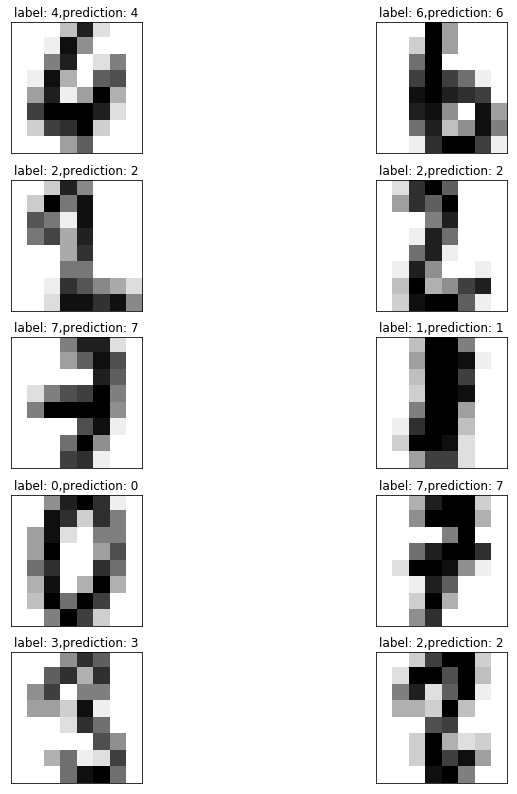

In [11]:
plot_10_img(x_test, y_test, y_pred)

#### Gradient Boosting Classifier

In [12]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
print('Accuracy of Gradient Boosting: %.4f' % accuracy_score(y_test, y_pred))

Accuracy of Gradient Boosting: 0.9667


In [13]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[47  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  1 40  0  0  0  0  0  1  0]
 [ 0  1  0 50  0  0  0  0  1  0]
 [ 0  0  0  0 39  1  0  0  0  0]
 [ 0  0  0  2  0 45  0  0  0  1]
 [ 1  0  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  1  0  0 41  0  0]
 [ 0  0  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  0  0  1  1 43]]


#### SVM

In [14]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print('Accuracy of SVM: %.4f' % accuracy_score(y_test, y_pred))

Accuracy of SVM: 0.9733


In [15]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[47  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  1 41  0  0  0  0  0  0  0]
 [ 0  1  0 50  0  0  0  1  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  0  0  1  0  0 40  3]
 [ 0  1  0  1  0  0  0  1  0 43]]
